Angelo Zhu
59714552

In [1]:
from __future__ import division

import numpy as np
np.random.seed(0)

import mltools as ml
import sys
sys.path.append('code')

import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
plt.set_cmap('jet');
%matplotlib inline
import warnings
warnings.filterwarnings('ignore'); # for deprecated matplotlib functions

## Problem 1

In [2]:
iris = np.genfromtxt("C:\\Users\\Angelo\\Downloads\\178-hw3-code\\data\\iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]   # get first two features & target
X,Y  = ml.shuffleData(X,Y)       # reorder randomly rather than by class label
X,_  = ml.transforms.rescale(X)  # rescale to improve numerical stability, speed convergence

XA, YA = X[Y<2,:], Y[Y<2]        # Dataset A: class 0 vs class 1
XB, YB = X[Y>0,:], Y[Y>0]        # Dataset B: class 1 vs class 2

### P1.1

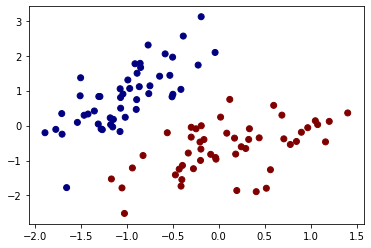

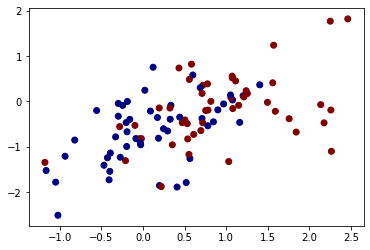

In [3]:
plt.scatter(XA[:,0], XA[:,1], c=YA)
plt.show()
plt.scatter(XB[:,0], XB[:,1], c=YB)
plt.show()

Dataset A with class 0 vs class 1 is linearly separable

### P1.2

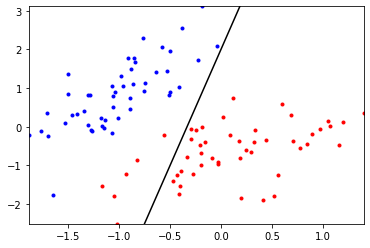

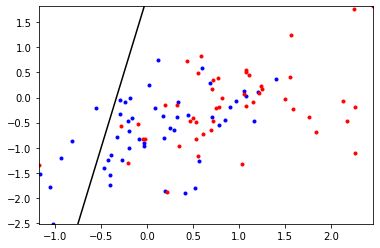

In [4]:
def myPlotBoundary(self, X,Y):
    """ Plot the (linear) decision boundary of the classifier, along with data """
    if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
    ax = X.min(0),X.max(0); ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1]);
    ## TODO: find points on decision boundary defined by theta0 + theta1 X1 + theta2 X2 == 0
    x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b
    x2b = -(x1b * self.theta[1] + self.theta[0]) / self.theta[2] # TODO find x2 values as a function of x1's values
    ## Now plot the data and the resulting boundary:
    A = Y==self.classes[0]; # and plot it:
    plt.plot(X[A,0],X[A,1],'b.',X[~A,0],X[~A,1],'r.',x1b,x2b,'k-'); plt.axis(ax); plt.draw();


# Create a shell classifier
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = None                   # these functions will be implemented later
    train = None

learnerA = logisticClassify2()
learnerA.classes = np.unique(YA)       # store the class values for this problem
learnerA.theta = np.array([2, 6, -1]);  # TODO: insert hard-coded values
learnerA.plotBoundary(XA,YA)
plt.show()

learnerB = logisticClassify2()
learnerB.classes = np.unique(YB)       # store the class values for this problem
learnerB.theta = np.array([2, 6, -1]);  # TODO: insert hard-coded values
learnerB.plotBoundary(XB,YB)
plt.show()

# P1.3

In [5]:
# Should go in your logistic2 class:
def myPredict(self,X):
    """ Return the predictied class of each data point in X"""
    Yhat = np.zeros(X.shape[0])
    for i in range(len(X)):
        linear_response = self.theta[0] + self.theta[1] * X[i,0] + self.theta[2] * X[i,1]
        if linear_response > 0:
            Yhat[i] = self.classes[1]
        else:
            Yhat[i] = self.classes[0]
    ## raise NotImplementedError
    ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2]  for each i
    ## TODO: if r[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
    ##       else predict class 0:  Yhat[i] = self.classes[0]
    return Yhat


# Update our shell classifier definition
class logisticClassify2(ml.classifier):
    classes = [] # added classes
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              
    train = None

learnerA = logisticClassify2()
learnerA.classes = np.unique(YA)       # store the class values for this problem
learnerA.theta = np.array([2, 5, -1]);  # TODO: insert hard-coded values
print("Error for class A: ", learnerA.err(XA,YA))

learnerB = logisticClassify2()
learnerB.classes = np.unique(YB)       # store the class values for this problem
learnerB.theta = np.array([2, 5, -1]);  # TODO: insert hard-coded values
print("Error for class B: ", learnerB.err(XB,YB))

Error for class A:  0.06060606060606061
Error for class B:  0.45454545454545453


# P1.4
If predict is implemented, then the inherited 2D visualization function should work; you can verify your decision boundary from P1.2:

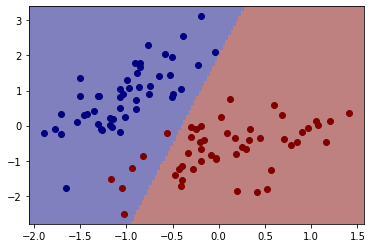

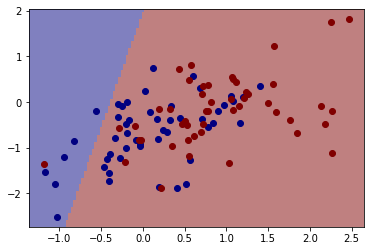

In [6]:
ml.plotClassify2D(learnerA,XA,YA)
plt.show()
ml.plotClassify2D(learnerB,XB,YB)
plt.show()

### 1.5 Gradient of NLL

Our negative log-likelihood loss is:
$$J_j(\theta) = - \begin{cases} \log( \sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=1 \\ \log(1-\sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=0 \end{cases}$$

$$J_j(\theta) = -y^{(i)}\log( \sigma(x^{(i)} \cdot \theta)) -(1 - y^{(i)})\log(1 - \sigma(x^{(i)} \cdot \theta))$$

Derive$$\nabla J_j(\theta) = \frac{-x^{(i)}y^{(i)} \sigma(x^{(i)} \cdot \theta)(1 -\sigma(x^{(i)} \cdot \theta))}{\sigma(x^{(i)} \cdot \theta)} + 
\frac{-x^{(i)}(1 - y^{(i)}) \sigma(x^{(i)} \cdot \theta)(1 -\sigma(x^{(i)} \cdot \theta))}{(1 - \sigma(x^{(i)} \cdot \theta))}$$ 

Chain rule and σ(r)' = σ(r)(1 − σ(r)$$\nabla J_j(\theta) = -x^{(i)} \sigma(x^{(i)} \cdot \theta)(1 -\sigma(x^{(i)})
\big[{\frac{y^{(i)}}{\sigma(x^{(i)} \cdot \theta)} + \frac{(1 - y^{(i)})}{(1 - \sigma(x^{(i)} \cdot \theta))}}\big]$$

Combine fractions in the brackets using algebra $$\nabla J_j(\theta) = -x^{(i)} \sigma(x^{(i)} \cdot \theta)(1 -\sigma(x^{(i)})
\big[{\frac{y^{(i)} - \sigma(x^{(i)} \cdot \theta)}{\sigma(x^{(i)} \cdot \theta)(1 - \sigma(x^{(i)} \cdot \theta))}}\big]$$

Thus, simplifying the gradient, we get: $$\nabla J_j(\theta) = \big[\sigma(x^{(i)} \cdot \theta) - y^{(i)}\big]x^{(i)}$$

## 1.6

Now define the train function and complete its missing code.

In [7]:
def sigmoid(response):
    return 1. / (1 + np.exp(-response))    

def response(x, theta):
    return np.dot(x, theta)

def err(x, y, theta):
    return np.mean((sigmoid(response(x, theta)) - y) **2)

def mse_grad(X, Y, theta):
        """Calculate gradient of loss/cost for logistic MSE. """
        nll = np.dot(-Y, np.log(sigmoid(response(X, theta)))) - 
                np.dot(1 - Y, np.log(1 - sigmoid(response(X, theta))))
        #f_val = sigmoid(response(X, theta))
        #error = f_val - Y
        #der_sigmoid = f_val * ( 1 - f_val )

        #tmp = error * der_sigmoid
        #derivative_sum = np.reshape(tmp, [-1, 1]) * X

        #return np.mean(derivative_sum, axis=0)  
        return nll

def myTrain(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=300, plot=None):
    """ Train the logistic regression using stochastic gradient descent """
    from IPython import display
    M,N = X.shape;                     # initialize the model if necessary:
    self.classes = np.unique(Y);       # Y may have two classes, any values
    XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
    if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
    # init loop variables:
    epoch=0; done=False; Jnll=[]; J01=[];
    s = np.zeros(M)

    while not done:
        stepsize, epoch = initStep*4.0/(2.0+epoch), epoch+1; # update stepsize
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            ri    = response(XX[i,:], self.theta)#self.theta[0] + self.theta[1] * XX[i,0] + self.theta[2] * XX[i,1];     # TODO: compute linear response r(x)
            s[i]  = sigmoid(ri)#math.pow((1 + math.exp(-ri)), -1);     
            gradi = (sigmoid(np.dot(XX[i,:], self.theta)) - YY[i]) * XX[i,:];   # TODO: compute gradient of NLL loss
            self.theta -= stepsize * gradi;  # take a gradient step
            # look at discussion notes

        J01.append( err(XX,YY, self.theta) )  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
        Jsur = sum([np.log(sigmoid(XX[i,:])) if YY[i] == 1 else np.log(1 - XX[i,:]) for i in range(len(YY))])
        Jnll.append(mse_grad(XX, YY, self.theta)) # TODO evaluate the current NLL loss
        display.clear_output(wait=True);
        
        plt.subplot(1,2,1); plt.cla(); plt.plot(Jnll,'b-',J01,'r-'); # plot losses
        if N==2: plt.subplot(1,2,2); plt.cla(); self.plotBoundary(X,Y); # & predictor if 2D
        #plt.pause(.01);                    # let OS draw the plot        

        ## For debugging: you may want to print current parameters & losses
        # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
        # raw_input()   # pause for keystroke

        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
        
        if (epoch > stopEpochs) or (len(Jnll) > 1 and abs(Jnll[-1] - Jnll[-2]) < stopTol):
            done = True
            # or if Jnll not changing between epochs ( < stopTol )

## 1.7

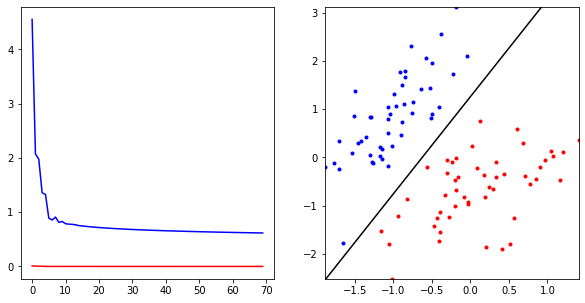

In [8]:
# Update our shell classifier definition
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              # Now all parts are implemented
    train = myTrain

plt.rcParams['figure.figsize'] = (10,5)    # make a wide figure, for two subplots
    
learnerA = logisticClassify2()
learnerA.theta = np.array([0.,0.,0.]);
learnerA.train(XA,YA,initStep=1.5,stopEpochs=500,stopTol=1e-3);

Dataset A: I used larger step sizes because I know this classifer can improve a lot on the dataset. Larger step sizes will make gradient descent go faster. I decided on stopEpochs=500 so the code will finish in a timely manner and because I know the classifer will has much room to get better.

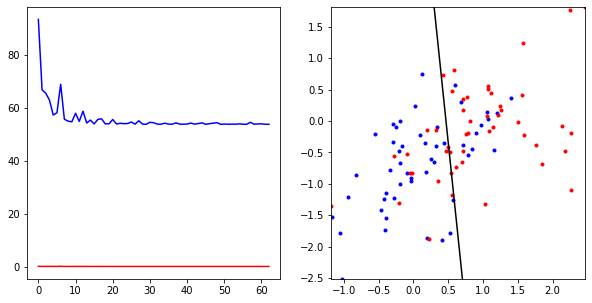

In [9]:
learnerB = logisticClassify2()
learnerB.theta = np.array([0.,0.,0.]);
learnerB.train(XB,YB,initStep=1,stopEpochs=300,stopTol=1e-2);

Dataset B: I left the step size small knowing that the classifer can only fit the data a little better through gradient descent. stopEpochs is also at 300 to let the code run in a timely manner. I can tell the classifier is optimizing by the graph getting zig-zaggy.

Training error rate for data set A:  0.0


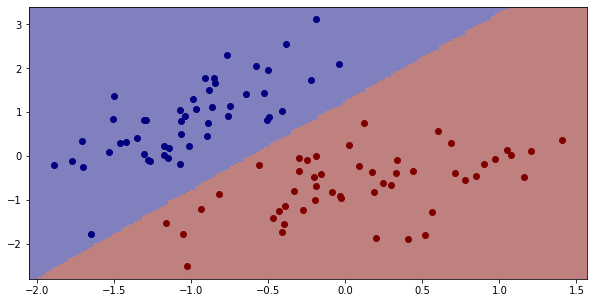

Training error rate for data set B:  0.26262626262626265


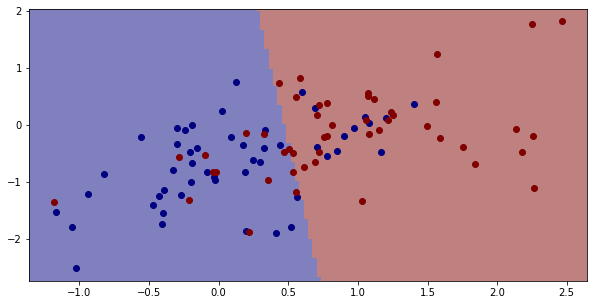

In [10]:
ml.plotClassify2D(learnerA,XA,YA)
print("Training error rate for data set A: ",learnerA.err(XA,YA))
plt.show()
ml.plotClassify2D(learnerB,XB,YB)
print("Training error rate for data set B: ",learnerB.err(XB,YB))
plt.show()

# Problem 2

## P2.1
##### A, B can be shattered
    The classifier, which is a vertical line, can classify any combination of binary values for the data set.
#### C, D cannot be shattered
    If (2,2) and (6,4) are the same class while (4,8) is the other class, the vertical line cannot satisfy all binary values. Therefore, d also cannot be shattered because c cannot be shattered
#### VC Dimension = 2

## P2.2
#### A, B can be shattered
    The classifier is a line with no constant, so it must pass through the origin. Variables a, b, c can change to move the line above, below, or inbetween the two points to achieve desired binary results.
#### C, D cannot be shattered
    The classifier has to pass through the origin and cannot shatter a scenario where the side of the line has two points with different binary values. Therefore, D also cannot be shattered.
#### VC Dimension = 2

## P2.3
#### A can be shattered
    There is a constant that makes the circle larger or smaller in order to satisfy binary results. The circle can encompass the point or not.
#### B, C, D cannot be shattered
    B cannot be shattered because if (2,2) was -1, there is no circle that ignores (2,2) and surrounds (4,8), where everything inside the circle should be +1
#### VC Dimension = 1

## P2.4
#### A, B, C, D can be shattered
    D can be shattered having (2,2) and (8,6) in the region between the parallel lines and the other two points outside the region of the lines. This solves the problem of it being geometrically impossible for a line with a slope and constant to shatter this sequence. The other dimensions can be shattered by going inbetween the points or above/below all the points. The parallel lines can have constants very close to each other.
#### VC Dimension = 4

## P3

Piazza, discussion notes, lecture slides for 1.5, professor's VC dimension youtube videos